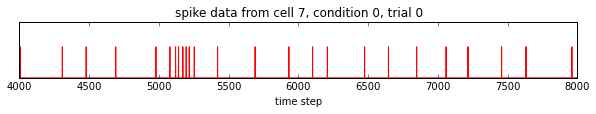

In [13]:
from matplotlib.pyplot import *
%matplotlib inline
import numpy as np
import pandas

cell = 7
condition = 0
dataframe = pandas.read_pickle('data/Moving_bars_ouput_cell_'+str(cell)+'.pkl')
# TODO RELATIVE PATH


figure(figsize=(10,1))
trial = 0
single_spiketrain = dataframe.ix[(condition,trial,0),4000:8000]
plot(np.arange(4000,8001),single_spiketrain,'r')
title('spike data from cell '+str(cell)+', condition '+str(condition)+', trial '+str(trial))
ylim([0,1.8])
yticks([])
xlabel('time step')

In [14]:
# collect spiketrains from all trials of that cell & condition, within some time limits
trials = []
trial = 0
while True:
    try:
        trials.append(dataframe.ix[(condition,trial,0),4000:8000])
        trial += 1
    except:
        break
        
T = len(trials[0])
N = len(trials)
all_spiketrains = np.hstack(trials)

In [ ]:
import splines
import statsmodels.api as sm


# spline_order = ...
# knots = ...
# spline_bases = ...
# dm = ...

# model = sm.GLM(...)
# fitted_model = model.fit()
# prediction = fitted_model.predict(...)



spline_order = 3                                                      # solution
knots = splines.augknt(np.linspace(0,T,15),spline_order)              # solution
spline_bases = np.array(splines.spcol(range(T),knots,spline_order))   # solution
dm = np.tile(spline_bases,(N,1))                                      # solution

model = sm.GLM(all_spiketrains,dm,family=sm.families.Binomial())      # solution
fitted_model = model.fit()                                            # solution
prediction = fitted_model.predict(spline_bases)                       # solution



figure()
plot(spline_bases)
title('spline basis functions')
xlabel('time step')

figure()
imshow(spline_bases,aspect='auto',interpolation='nearest')
title('spline basis functions (2D plot)')
ylabel('time step')
xlabel('basis function nr')

figure(figsize=(5,15))
imshow(dm,aspect='auto',interpolation='nearest')
title('design matrix')
ylabel('time step * trial')
xlabel('basis function nr')

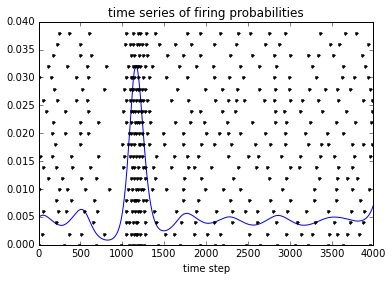

In [63]:
spike_t = np.where(all_spiketrains)[0]
spike_y = (spike_t/T)*0.04/N
spike_t%= T

figure()
plot(prediction)
#plot(trials[3],'r',alpha=0.2)
plot(spike_t,spike_y,"k.")
ylim([0,0.04])
title('time series of firing probabilities')
xlabel('time step')

In [71]:
def ll(ps,xs):
    """returns the log likelihood of a spike train xs
    given a sequence of firing probabilities ps.
    
    Arguments:
        ps: 1D float array of length trial_length
        xs: 1D binary array of length trial_length
"""
    # your code here
    return sum(xs*np.log(ps) +(1 - xs) * np.log(1-ps))     # solution

for num_knots in [5,10,20,50]:
    knots = splines.augknt(np.linspace(0,T,num_knots),spline_order)              # solution
    spline_bases = np.array(splines.spcol(range(T),knots,spline_order))   # solution
    dm = np.tile(spline_bases,(N-1,1))  # solution
    loglikelihood = 0
    for i,test in enumerate(trials):
        train = trials[:i] + trials[i+1:]
        model = sm.GLM(np.hstack(train),dm,family=sm.families.Binomial())      # solution
        fitted_model = model.fit()                                            # solution
        prediction = fitted_model.predict(spline_bases)                       # solution
        loglikelihood += ll(prediction,test)/N
    print num_knots, loglikelihood

5 -135.082921387
10 -134.409651036
20 -131.539054433
50 -132.418619813


In [65]:
fitted_model.

-2627.199123583378